In [ ]:
# 1010 패턴

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1010 패턴을 이용해서 데이터를 생성하는 함수
def generate_real():
  return torch.FloatTensor([1,0,1,0])

In [3]:
generate_real()

tensor([1., 0., 1., 0.])

In [4]:
import random

In [5]:
# 데이터 생성
def generate_real():
  real_data = torch.FloatTensor([
   random.uniform(0.8,1.0),
   random.uniform(0.0,0.2),   
   random.uniform(0.8,1.0),
   random.uniform(0.0,0.2)
  ])
  return real_data

generate_real()  

tensor([0.9175, 0.1078, 0.8070, 0.1557])

In [ ]:
# 판별기
class Discriminator(nn.Module):
  # 초기화
  def __init__(self) -> None:
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(4,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )
    # 손실함수 지정
    self.loss_function = nn.MSELoss()
    # 옵티마이져 - 스토캐스틱 경사하강법(확율적 경사하강법)
    self.optimizer = torch.optim.SGD(self.parameters(), lr= 1e-2)

    # 측정을 위한 변수
    self.count = 0;
    self.progress = [] 

  def forward(self,inputs):
    return self.model(inputs)
    
  def train(self, inputs, targets):
    # 신경망의 출력 계산(예측)
    outputs = self.forward(inputs)
    # 손실계산
    loss = self.loss_function(outputs,targets) 

    # 10회마다 오차를 저장
    self.count += 1;
    if self.count % 10 == 0:
      print(f"count = {self.count}")      
      self.progress.append(loss.detach().numpy() )
    
    # 기울기를 초기화하고 역전파후 가중치 갱신
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()    

  # 누적된 손실을 시각화
  def plot_progress(self):
    # progress = self.progress.detach().numpy()
    df = pd.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker = '.', yticks=(0,0.25,0.5),grid=True )

In [ ]:
# 판별기 테스트 - 생성기 만들기전에 제대로 판별하는지 확인
# 노이즈 패턴 만들기
def generate_random(size):
  return torch.rand(size)


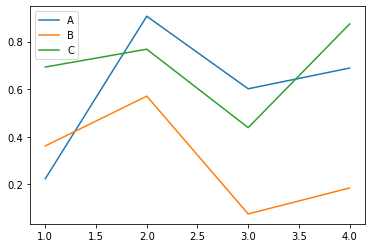

In [ ]:
temp = pd.DataFrame({'A': torch.rand(4),
                    'B': torch.rand(4),
                     'C': torch.rand(4)},
                    index=[1, 2, 3, 4])
temp.plot()

In [ ]:
# 1010 패턴데이터는 진짜.... 출력은 1
# 노이즈 패턴 가짜           출력은 0
# 10000번 훈련
D = Discriminator()
for i in range(10000):
  # 실제데이터
  D.train(generate_real(), torch.FloatTensor([1.0]))
  # 생성된 데이터
  D.train(generate_random(4), torch.FloatTensor([0.0]))

In [ ]:
torch.FloatTensor([1,0]), generate_real()

(tensor([1., 0.]), tensor([0.8656, 0.0043, 0.8389, 0.1639]))

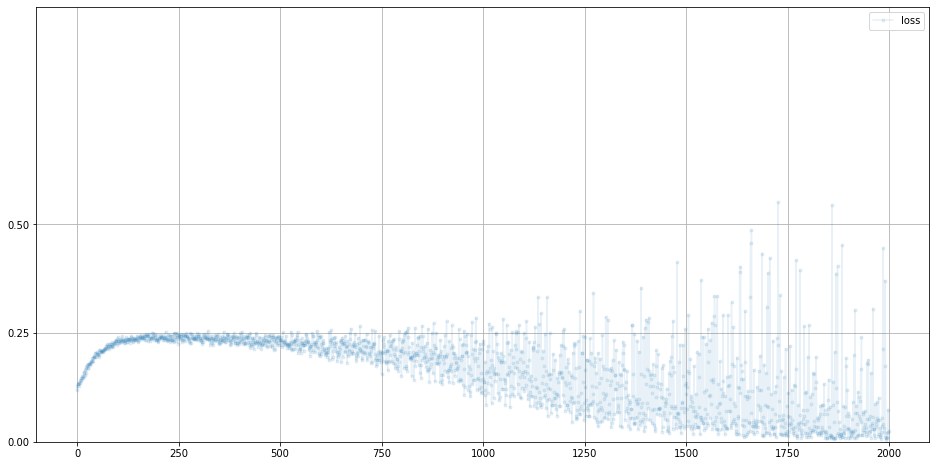

In [ ]:
D.plot_progress()

In [ ]:
D.forward(generate_real()).item(), D.forward(generate_random(4)).item()

(0.7772311568260193, 0.1361715942621231)

In [ ]:
# 생성기
class Generator(nn.Module):
  # 초기화
  def __init__(self) -> None:
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(1,3),
        nn.Sigmoid(),
        nn.Linear(3,4),
        nn.Sigmoid()
    )
    # 손실함수 지정
    self.loss_function = nn.MSELoss()
    # 옵티마이져 - 스토캐스틱 경사하강법(확율적 경사하강법)
    self.optimizer = torch.optim.SGD(self.parameters(), lr= 1e-2)

    # 측정을 위한 변수
    self.count = 0;
    self.progress = [] 

  def forward(self,inputs):
    return self.model(inputs)

  def train(self, D,inputs, targets):
    # 신경망의 출력 계산(예측)
    outputs = self.forward(inputs)
    # 판별기로 전달
    outputs = D.forward(outputs)

    # 손실계산
    loss = self.loss_function(outputs,targets) 

    # 10회마다 오차를 저장
    self.count += 1;
    if self.count % 10 == 0:      
      self.progress.append(loss.detach().numpy() )
    
    # 기울기를 초기화하고 역전파후 가중치 갱신
    self.optimizer.zero_grad()
    loss.backward()
    self.optimizer.step()      
  # 누적된 손실을 시각화
  def plot_progress(self):
    # progress = self.progress.detach().numpy()
    df = pd.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker = '.', yticks=(0,0.25,0.5),grid=True )    

In [ ]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.6933, 0.4606, 0.3680, 0.4897], grad_fn=<SigmoidBackward0>)

In [ ]:
D = Discriminator()
G = Generator()
for i in range(10000):
  # 참에대한 판별기 훈련
  D.train(generate_real(), torch.FloatTensor([1.0]))

  # 거짓dp 대한 판별기 훈련
  # 이때 G의 기울기가 계산되면 안된다. detach()이용
  D.train( G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0] ))
  # 생성기 훈련
  G.train(D,torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))


count = 10
count = 20
count = 30
count = 40
count = 50
count = 60
count = 70
count = 80
count = 90
count = 100
count = 110
count = 120
count = 130
count = 140
count = 150
count = 160
count = 170
count = 180
count = 190
count = 200
count = 210
count = 220
count = 230
count = 240
count = 250
count = 260
count = 270
count = 280
count = 290
count = 300
count = 310
count = 320
count = 330
count = 340
count = 350
count = 360
count = 370
count = 380
count = 390
count = 400
count = 410
count = 420
count = 430
count = 440
count = 450
count = 460
count = 470
count = 480
count = 490
count = 500
count = 510
count = 520
count = 530
count = 540
count = 550
count = 560
count = 570
count = 580
count = 590
count = 600
count = 610
count = 620
count = 630
count = 640
count = 650
count = 660
count = 670
count = 680
count = 690
count = 700
count = 710
count = 720
count = 730
count = 740
count = 750
count = 760
count = 770
count = 780
count = 790
count = 800
count = 810
count = 820
count = 830
count = 840
c

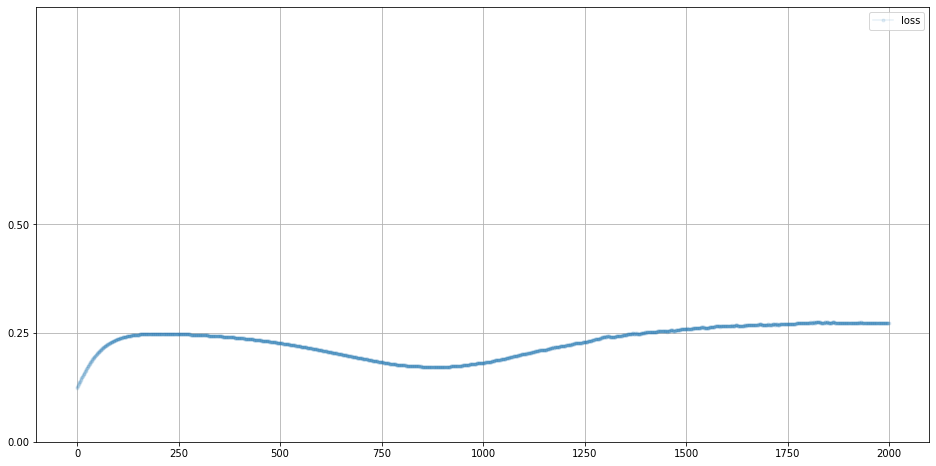

In [ ]:
D.plot_progress()

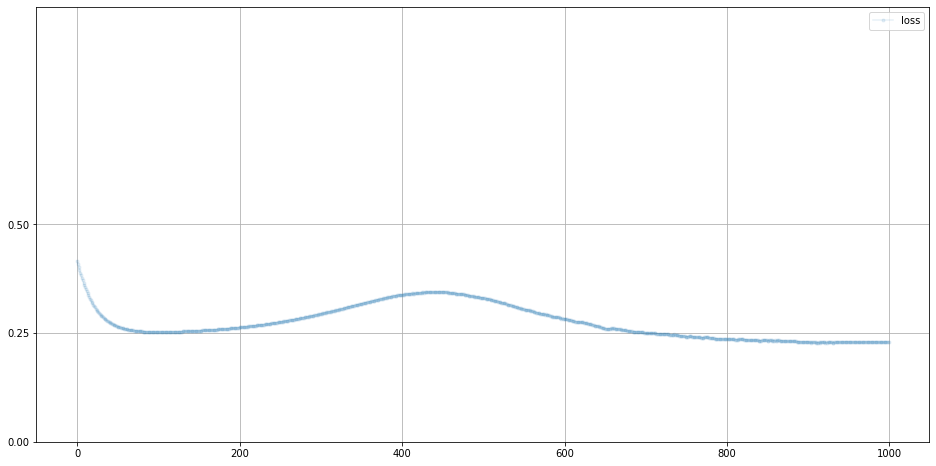

In [ ]:
G.plot_progress()

In [ ]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9307, 0.0356, 0.9440, 0.0395], grad_fn=<SigmoidBackward0>)